In [1]:
# Import libraries necessary for this project

%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Take a look at the dataset

bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Add column names

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
print (boston.target.shape)

(506,)


In [10]:
# pandas dataframe called bos

bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Basic summary statistics for each column

bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


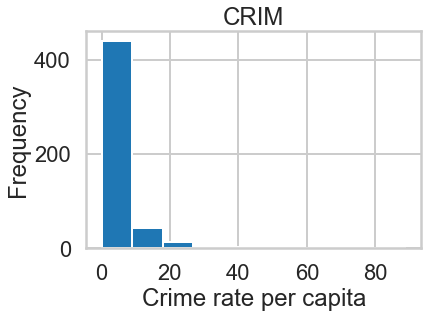

In [12]:
# Histogram for crime rate

plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Import regression modules
# ols - stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
# ols regression results
m = ols('PRICE ~ CRIM',bos).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.17e-19
Time:                        22:57:54   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

In [15]:
from sklearn.linear_model import LinearRegression
X = bos.drop('CRIM', axis = 1)



In [16]:
lm = LinearRegression()
lm

LinearRegression()

In [17]:
# Use the CRIM variable to fit linear regression model
lm.fit(X, bos.CRIM)

LinearRegression()

In [18]:
# est int coeff

print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 17.033227522634824


In [19]:
# number of coeff

print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [20]:
# first five predicted prices
lm.predict(X)[0:5]

array([-0.78495408, -0.97987163, -3.89677102, -4.12752136, -4.32358616])

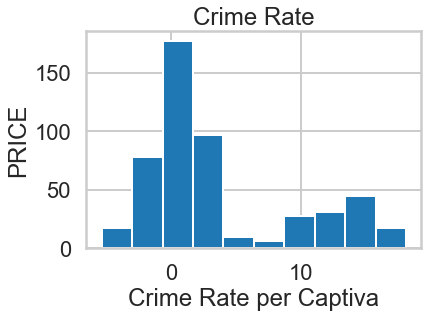

In [21]:
# crime rate table

plt.hist(lm.predict(X))
plt.title("Crime Rate")
plt.xlabel("Crime Rate per Captiva")
plt.ylabel("PRICE")
plt.show()

In [22]:
# print

print (np.sum((bos.CRIM - lm.predict(X)) ** 2))

20399.931010268065


In [23]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X) - bos.CRIM) ** 2))

Mean squared error: 40.32


In [24]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

In [25]:
lm.fit(X, bos.PRICE)

LinearRegression()

In [26]:
print ('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -5.186961971048731e-13


In [27]:
print ('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [28]:
# first five predicted prices
lm.predict(X)[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

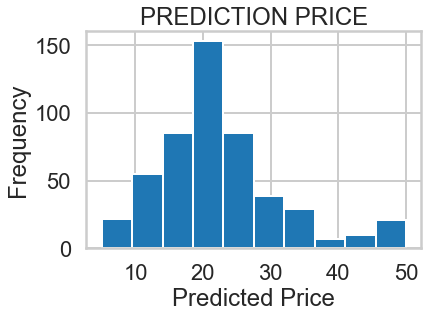

In [29]:
plt.hist(lm.predict(X))
plt.title("PREDICTION PRICE")
plt.xlabel("Predicted Price")
plt.ylabel("Frequency")
plt.show()

In [30]:
print (np.sum((bos.PRICE - lm.predict(X)) ** 2))

5.242600759865127e-24


In [31]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(X) - bos.PRICE) ** 2))

Mean squared error: 0.00


In [34]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.CRIM[:-50]
Y_test = bos.CRIM[-50:]
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [35]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.CRIM, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [36]:
from sklearn import linear_model
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regrfit= regr2.fit(X_train, Y_train)

#Predicting the target variable from test.
Y_pred = regr2.predict(X_test)

# The coefficients
print('Coefficients: \n', regr2.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((Y_pred - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(X_test, Y_test))

Coefficients: 
 [ 4.43944536e-02 -4.46218819e-02 -1.44446800e+00 -1.07148068e+01
  1.76940294e+00 -1.08675202e-02 -1.12897367e+00  5.80212255e-01
 -3.15030500e-03 -3.30422255e-01  7.26722488e-03  1.70588077e-01
 -3.03211969e-01]
Mean squared error: 50.42
Variance score: 0.38


In [37]:
# The mean squared error
print("Mean squared error with test data: %.2f"
      % np.mean((Y_pred - Y_test) ** 2))

Y_pred1 = regr2.predict(X_train)

print("Mean squared error with train data: %.2f"
      % np.mean((Y_pred1 - Y_train) ** 2))

#MSE is less with trained data than test data

Mean squared error with test data: 50.42
Mean squared error with train data: 37.90


Text(0, 0.5, 'Residuals')

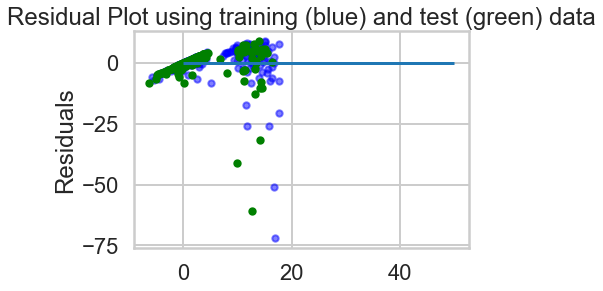

In [38]:
# Residual plots

plt.scatter(regr2.predict(X_train), regr2.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(regr2.predict(X_test), regr2.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')